<a href="https://colab.research.google.com/github/v41bh4v/Quantum-Machine-Learning/blob/master/QML_Qiskit_QSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit


     |████████████████████████████████| 8.5MB 3.7MB/s 
     |████████████████████████████████| 17.6MB 249kB/s 
     |████████████████████████████████| 204kB 56.3MB/s 
     |████████████████████████████████| 204kB 50.2MB/s 
     |████████████████████████████████| 2.1MB 47.8MB/s 
     |████████████████████████████████| 5.9MB 38.9MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 1.3MB 50.6MB/s 
     |████████████████████████████████| 194kB 39.1MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 614kB 38.2MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
     |████████████████████████████████| 2.6MB 52.3MB/s 
     |████████████████████████████████| 5.5MB 49.7MB/s 
  Created wheel for qiskit: filename=qiskit-0.23.2-cp36-none-any.whl size=2876 sha256=cf07f9c1399d093b8fdfdb5d49c7eea58de1f2f3bbf043a9366950a570268d10
  Stored in directory: /root/.cache/pip/wheels/c2/62/3e/d5aeec3b19ba0e

In [2]:
import qiskit


In [6]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels,map_label_to_class_name

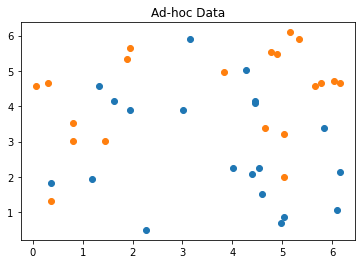

{'A': 0, 'B': 1}


In [21]:
feature_dim = 2
training_dataset_size = 20
testing_dataset_size = 10
random_seed = 10598
shot = 10000

sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_dataset_size,
                                                                     test_size=testing_dataset_size,
                                                                     gap=0.5,
                                                                     n=feature_dim,
                                                                     plot_data=True)
datapoints,class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)



In [11]:
#Backend to run QSVM

backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim,reps=2)
svm = QSVM(feature_map,training_input,test_input,None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend,shots=shot,seed_simulator=random_seed,seed_transpiler=random_seed)
result = svm.run(quantum_instance)

Kernel matrix during the training


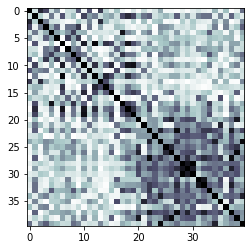

In [17]:
print("Kernel matrix during the training")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation = 'nearest',origin='upper',cmap='bone_r')
plt.show()

In [19]:
predicted_labels =svm.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels,svm.label_to_class)
print("ground truth: {}".format(datapoints[1]))
print("prediction:   {}".format(predicted_labels))
print("testing success ratio:", result['testing_accuracy'])

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
prediction:   [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1]
testing success ratio: 0.95
